<a href="https://colab.research.google.com/github/buthaina279/LSTM_MIMIC-III/blob/main/pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#for google drive
DATA_FILEPATH = "/content/drive/MyDrive/final_project/"

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(DATA_FILEPATH + 'stat_cv_vitals_labs.csv',index_col=0) 

In [ ]:
df.head()

,subject_id,hadm_id,icustay_id,gender,ethnicity,age,insurance,fullcode_first,dnr_first,fullcode,...,weight_mean,weight_std,white blood cell count_mean,white blood cell count_std,white blood cell count urine_mean,white blood cell count urine_std,ph_mean,ph_std,ph urine_mean,ph urine_std
0,3,145834,211552,M,WHITE,76,Medicare,1.0,0.0,1.0,...,NaN,NaN,14.842857,4.012837,NaN,NaN,7.40,0.147733,5.0,NaN
1,3,145834,211552,M,WHITE,76,Medicare,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,145834,211552,M,WHITE,76,Medicare,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,7.26,0.000000,NaN,NaN
3,3,145834,211552,M,WHITE,76,Medicare,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3,145834,211552,M,WHITE,76,Medicare,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(665138, 230)

In [ ]:
nnz_df = np.count_nonzero(df['mort_icu']) # class 1 population
nz_df = len(df['mort_icu']) - nnz_df # class 0 population
class_0_ratio = 100* (nz_df/ len(df['mort_icu']))
class_1_ratio = 100* (nnz_df / len(df['mort_icu']))
print('%0.2f percent of  data belong to the negative class' % class_0_ratio)
print('%0.2f percent of  data belong to the positive class' % class_1_ratio)

# Find out imbalance ratio
imbalance_ratio = nz_df / nnz_df
print('imbalance ratio: %0.2f' % (imbalance_ratio))

93.12 percent of  data belong to the negative class
6.88 percent of  data belong to the positive class
imbalance ratio: 13.53


##Check the missing values

In [ ]:
def missing(df):
        # Total missing values
        val = df.isnull().sum()
        
        # Percentage of missing values
        percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        table = pd.concat([val, percent], axis=1)
        
        # Rename the columns
        table_ren_columns = table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        table_ren_columns = table_ren_columns[table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
        # Return the dataframe with missing information
        return table_ren_columns

In [ ]:
missing(df)

,Missing Values,% of Total Values
lymphocytes pleural_std,665138,100.0
lactate dehydrogenase pleural_std,665138,100.0
lymphocytes percent_std,665138,100.0
albumin pleural_std,665138,100.0
albumin ascites_std,665138,100.0
...,...,...
mean blood pressure_mean,79367,11.9
diastolic blood pressure_mean,77214,11.6
systolic blood pressure_mean,77078,11.6
respiratory rate_mean,72696,10.9


Remove the columns that have greater than 70% missing values

In [ ]:
df = df.drop(df.loc[:,list((100*(df.isnull().sum()/len(df))>=70))].columns, 1)
print("The shape is",df.shape)

The shape is (665138, 30)


In [ ]:
missing(df)

,Missing Values,% of Total Values
glucose_mean,458581,68.9
temperature_mean,433947,65.2
fullcode_first,121075,18.2
dnr_first,121075,18.2
fullcode,121075,18.2
dnr,121075,18.2
cmo_first,121075,18.2
cmo_last,121075,18.2
cmo,121075,18.2
oxygen saturation_mean,83247,12.5


In [ ]:
df.head()

,subject_id,hadm_id,icustay_id,gender,ethnicity,age,insurance,fullcode_first,dnr_first,fullcode,...,max_hours,hours_in,diastolic blood pressure_mean,glucose_mean,heart rate_mean,mean blood pressure_mean,oxygen saturation_mean,respiratory rate_mean,systolic blood pressure_mean,temperature_mean
0,3,145834,211552,M,WHITE,76,Medicare,1.0,0.0,1.0,...,145,0,39.666667,198.555556,143.00,101.555567,74.00,16.000000,95.166667,NaN
1,3,145834,211552,M,WHITE,76,Medicare,1.0,0.0,1.0,...,145,1,44.125000,NaN,153.75,57.333337,NaN,15.500000,81.000000,NaN
2,3,145834,211552,M,WHITE,76,Medicare,1.0,0.0,1.0,...,145,2,47.333333,267.000000,137.75,63.222217,98.50,7.000000,90.666667,NaN
3,3,145834,211552,M,WHITE,76,Medicare,1.0,0.0,1.0,...,145,3,64.500000,NaN,129.25,84.750000,99.75,5.250000,117.000000,NaN
4,3,145834,211552,M,WHITE,76,Medicare,1.0,0.0,1.0,...,145,4,63.000000,NaN,146.00,77.000000,98.00,13.666667,102.000000,NaN


In [ ]:
df.columns

Index(['subject_id', 'hadm_id', 'icustay_id', 'gender', 'ethnicity', 'age',
       'insurance', 'fullcode_first', 'dnr_first', 'fullcode', 'dnr',
       'cmo_first', 'cmo_last', 'cmo', 'los_icu', 'admission_type',
       'first_careunit', 'mort_icu', 'hospstay_seq', 'readmission_30',
       'max_hours', 'hours_in', 'diastolic blood pressure_mean',
       'glucose_mean', 'heart rate_mean', 'mean blood pressure_mean',
       'oxygen saturation_mean', 'respiratory rate_mean',
       'systolic blood pressure_mean', 'temperature_mean'],
      dtype='object')

forward filling and backward filling

In [ ]:
df = df.ffill().bfill()

In [ ]:
df.head()

,subject_id,hadm_id,icustay_id,gender,ethnicity,age,insurance,fullcode_first,dnr_first,fullcode,...,max_hours,hours_in,diastolic blood pressure_mean,glucose_mean,heart rate_mean,mean blood pressure_mean,oxygen saturation_mean,respiratory rate_mean,systolic blood pressure_mean,temperature_mean
0,3,145834,211552,M,WHITE,76,Medicare,1.0,0.0,1.0,...,145,0,39.666667,198.555556,143.00,101.555567,74.00,16.000000,95.166667,36.488895
1,3,145834,211552,M,WHITE,76,Medicare,1.0,0.0,1.0,...,145,1,44.125000,198.555556,153.75,57.333337,74.00,15.500000,81.000000,36.488895
2,3,145834,211552,M,WHITE,76,Medicare,1.0,0.0,1.0,...,145,2,47.333333,267.000000,137.75,63.222217,98.50,7.000000,90.666667,36.488895
3,3,145834,211552,M,WHITE,76,Medicare,1.0,0.0,1.0,...,145,3,64.500000,267.000000,129.25,84.750000,99.75,5.250000,117.000000,36.488895
4,3,145834,211552,M,WHITE,76,Medicare,1.0,0.0,1.0,...,145,4,63.000000,267.000000,146.00,77.000000,98.00,13.666667,102.000000,36.488895


In [ ]:
missing(df)

,Missing Values,% of Total Values


##Check duplicated

In [ ]:
# Shows the duplicated data
df.duplicated().sum()

0

##Remove hospital sequence

because it has only 1 unique values

In [ ]:
df.drop(['hospstay_seq'], axis=1, inplace=True)

##Check outliers

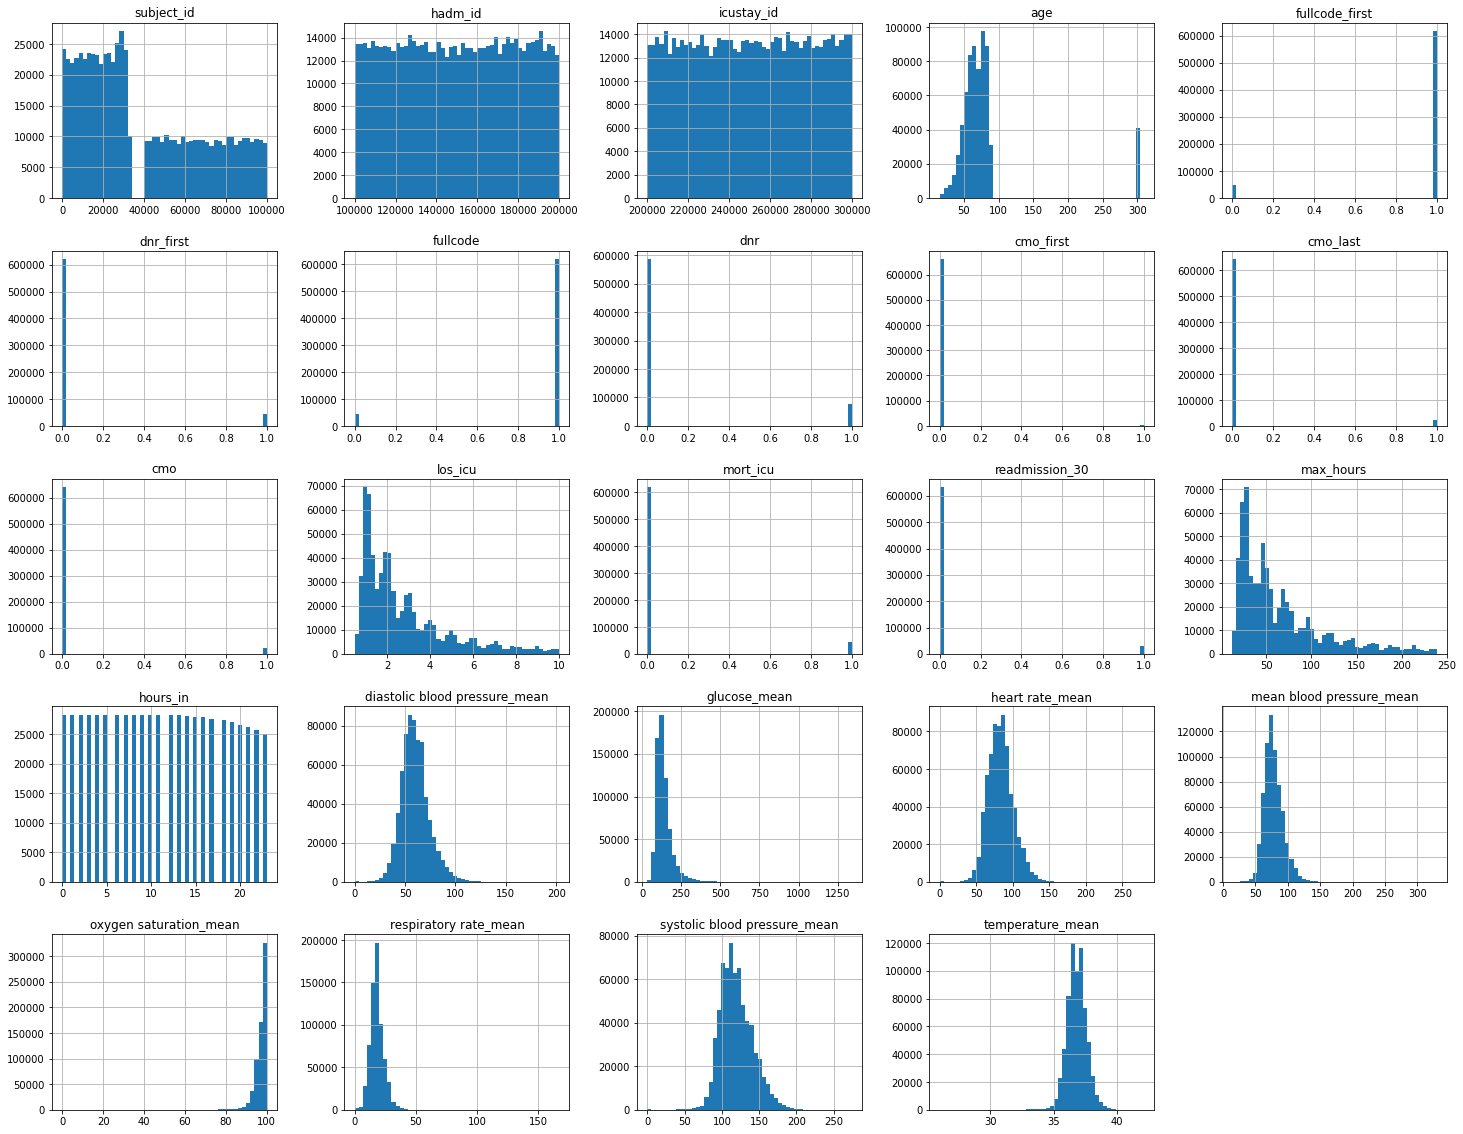

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

df.hist(bins=50,figsize=(25,20));

Replace age greater than 89 with 90 

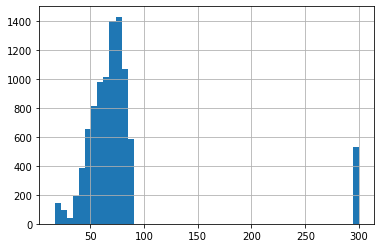

In [ ]:
df['age'].hist(bins=50)

In [ ]:
df['age'] = np.where(df['age'] > 89, 90, df['age'])

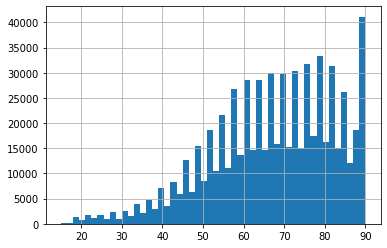

In [ ]:
df['age'].hist(bins=50)

##Check the number of the unique values in the categorical features

In [ ]:
df['gender'].nunique()

2

In [ ]:
df['ethnicity'].nunique()

41

In [ ]:
df['insurance'].nunique()

5

In [ ]:
df['admission_type'].nunique()

3

In [ ]:
df['first_careunit'].nunique()

5

##Featre engineering
One-hot encoding

In [ ]:
df_dum = pd.get_dummies(df)
print("The shape after applying the function is ",df_dum.shape)

The shape after applying the function is  (665138, 80)


In [ ]:
df_dum.head()

,subject_id,hadm_id,icustay_id,age,fullcode_first,dnr_first,fullcode,dnr,cmo_first,cmo_last,...,insurance_Private,insurance_Self Pay,admission_type_ELECTIVE,admission_type_EMERGENCY,admission_type_URGENT,first_careunit_CCU,first_careunit_CSRU,first_careunit_MICU,first_careunit_SICU,first_careunit_TSICU
0,3,145834,211552,76,1.0,0.0,1.0,1.0,0.0,0.0,...,0,0,0,1,0,0,0,1,0,0
1,3,145834,211552,76,1.0,0.0,1.0,1.0,0.0,0.0,...,0,0,0,1,0,0,0,1,0,0
2,3,145834,211552,76,1.0,0.0,1.0,1.0,0.0,0.0,...,0,0,0,1,0,0,0,1,0,0
3,3,145834,211552,76,1.0,0.0,1.0,1.0,0.0,0.0,...,0,0,0,1,0,0,0,1,0,0
4,3,145834,211552,76,1.0,0.0,1.0,1.0,0.0,0.0,...,0,0,0,1,0,0,0,1,0,0


##Save te output

In [ ]:
df_dum.to_csv(DATA_FILEPATH +'preprocessed_data_398.csv')